In [101]:
# import required libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [102]:
# load the data 

transactions = pd.read_excel('Transaction.xlsx')
users = pd.read_excel("User.xlsx")
cities = pd.read_excel('City.xlsx')
types = pd.read_excel('Type.xlsx')
visit_modes = pd.read_excel('Mode.xlsx')
continents = pd.read_excel('Continent.xlsx')
countries = pd.read_excel('Country.xlsx')
regions = pd.read_excel('Region.xlsx')
items = pd.read_excel('Updated_Item.xlsx')

In [103]:
users.head(1)

,UserId,ContinentId,RegionId,CountryId,CityId
0,14,5,20,155,220.0


In [104]:
cities.head(1)

,CityId,CityName,CountryId
0,0,-,0


In [105]:
users_full = users.merge(cities[['CityId','CityName']], on = 'CityId', how = 'left')
users_full.head(1)

,UserId,ContinentId,RegionId,CountryId,CityId,CityName
0,14,5,20,155,220.0,Lagos


In [106]:
continents.head(1)

,ContinentId,Continent
0,0,-


In [107]:
users_full = users_full.merge(continents, on = 'ContinentId', how = 'left')
users_full.head(1)

,UserId,ContinentId,RegionId,CountryId,CityId,CityName,Continent
0,14,5,20,155,220.0,Lagos,Europe


In [108]:
countries.head(1)

,CountryId,Country,RegionId
0,0,-,0


In [109]:

users_full = users_full.merge(countries[['CountryId','Country']],on = 'CountryId',how ='left')
users_full.head(1)

,UserId,ContinentId,RegionId,CountryId,CityId,CityName,Continent,Country
0,14,5,20,155,220.0,Lagos,Europe,Portugal


In [110]:
regions.head(1)

,Region,RegionId,ContinentId
0,-,0,0


In [111]:
users_full = users_full.merge(regions[['Region','RegionId']], on = 'RegionId',how ='left')
users_full.head(1)

,UserId,ContinentId,RegionId,CountryId,CityId,CityName,Continent,Country,Region
0,14,5,20,155,220.0,Lagos,Europe,Portugal,Southern Europe


In [112]:
types.head(1)

,AttractionTypeId,AttractionType
0,2,Ancient Ruins


In [113]:
items.head(1)

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta


In [114]:
items_full = items.merge(types, on ='AttractionTypeId' ,how = 'left')
items_full.head(1)

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType
0,369,1,13,Kuta Beach - Bali,Kuta,Beaches


In [115]:
visit_modes.head(10)

,VisitModeId,VisitMode
0,0,-
1,1,Business
2,2,Couples
3,3,Family
4,4,Friends
5,5,Solo


In [116]:
transactions.head(1)

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,3,70456,2022,10,2,640,5


In [117]:
transactions.rename(columns = {'VisitMode':'VisitModeId'},inplace = True)
transactions.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating
0,3,70456,2022,10,2,640,5
1,8,7567,2022,10,4,640,5
2,9,79069,2022,10,3,640,5
3,10,31019,2022,10,3,640,3
4,15,43611,2022,10,2,640,3


In [118]:
transactions['VisitModeId'].value_counts()

VisitModeId
2    21620
3    15217
4    10945
5     4525
1      623
Name: count, dtype: int64

In [119]:
visit_modes['VisitModeId'].value_counts()

VisitModeId
0    1
1    1
2    1
3    1
4    1
5    1
Name: count, dtype: int64

In [120]:
transactions_full = transactions.merge(visit_modes , on = 'VisitModeId',how = 'left')
transactions_full.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,VisitMode
0,3,70456,2022,10,2,640,5,Couples
1,8,7567,2022,10,4,640,5,Friends
2,9,79069,2022,10,3,640,5,Family
3,10,31019,2022,10,3,640,3,Family
4,15,43611,2022,10,2,640,3,Couples


In [121]:
df = transactions_full.merge(items_full ,on = 'AttractionId' , how = 'left')
df.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,VisitMode,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType
0,3,70456,2022,10,2,640,5,Couples,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
1,8,7567,2022,10,4,640,5,Friends,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
2,9,79069,2022,10,3,640,5,Family,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
3,10,31019,2022,10,3,640,3,Family,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas
4,15,43611,2022,10,2,640,3,Couples,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas


In [122]:
df = df.merge(users_full , on = 'UserId', how = 'left')
df.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,VisitMode,AttractionCityId,AttractionTypeId,...,AttractionAddress,AttractionType,ContinentId,RegionId,CountryId,CityId,CityName,Continent,Country,Region
0,3,70456,2022,10,2,640,5,Couples,1,63,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,5,21,163,4341.0,Guildford,Europe,United Kingdom,Western Europe
1,8,7567,2022,10,4,640,5,Friends,1,63,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,8,48,464.0,Ontario,America,Canada,Northern America
2,9,79069,2022,10,3,640,5,Family,1,63,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,9,54,774.0,Brazil,America,Brazil,South America
3,10,31019,2022,10,3,640,3,Family,1,63,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,5,17,135,583.0,Zurich,Europe,Switzerland,Central Europe
4,15,43611,2022,10,2,640,3,Couples,1,63,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,5,21,163,1396.0,Manchester,Europe,United Kingdom,Western Europe


In [123]:
# check for the null vlaues 
df.isnull().sum()

TransactionId        0
UserId               0
VisitYear            0
VisitMonth           0
VisitModeId          0
AttractionId         0
Rating               0
VisitMode            0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
AttractionType       0
ContinentId          0
RegionId             0
CountryId            0
CityId               8
CityName             8
Continent            0
Country              0
Region               0
dtype: int64

In [124]:
df.shape

(52930, 21)

In [125]:
df.dropna(inplace = True)

In [126]:
df.shape

(52922, 21)

In [127]:
df.isnull().sum().any()

False

In [128]:
# CHECK THE DATA TYPES 
df.dtypes

TransactionId          int64
UserId                 int64
VisitYear              int64
VisitMonth             int64
VisitModeId            int64
AttractionId           int64
Rating                 int64
VisitMode             object
AttractionCityId       int64
AttractionTypeId      object
Attraction            object
AttractionAddress     object
AttractionType        object
ContinentId            int64
RegionId               int64
CountryId              int64
CityId               float64
CityName              object
Continent             object
Country               object
Region                object
dtype: object

In [129]:
# Then convert to integer type
df['CityId'] = df['CityId'].astype(int)
df['AttractionTypeId'] = df['AttractionTypeId'].astype(int)


In [130]:
df.dtypes

TransactionId         int64
UserId                int64
VisitYear             int64
VisitMonth            int64
VisitModeId           int64
AttractionId          int64
Rating                int64
VisitMode            object
AttractionCityId      int64
AttractionTypeId      int32
Attraction           object
AttractionAddress    object
AttractionType       object
ContinentId           int64
RegionId              int64
CountryId             int64
CityId                int32
CityName             object
Continent            object
Country              object
Region               object
dtype: object

In [131]:
df.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,VisitMode,AttractionCityId,AttractionTypeId,...,AttractionAddress,AttractionType,ContinentId,RegionId,CountryId,CityId,CityName,Continent,Country,Region
0,3,70456,2022,10,2,640,5,Couples,1,63,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,5,21,163,4341,Guildford,Europe,United Kingdom,Western Europe
1,8,7567,2022,10,4,640,5,Friends,1,63,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,8,48,464,Ontario,America,Canada,Northern America
2,9,79069,2022,10,3,640,5,Family,1,63,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,9,54,774,Brazil,America,Brazil,South America
3,10,31019,2022,10,3,640,3,Family,1,63,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,5,17,135,583,Zurich,Europe,Switzerland,Central Europe
4,15,43611,2022,10,2,640,3,Couples,1,63,...,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,5,21,163,1396,Manchester,Europe,United Kingdom,Western Europe


# EDA

In [132]:
df['visit_day_of_year'] = pd.to_datetime(df['VisitYear'].astype(str) + '-' + df['VisitMonth'].astype(str) + '-01').dt.dayofyear


In [133]:
df.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,VisitMode,AttractionCityId,AttractionTypeId,...,AttractionType,ContinentId,RegionId,CountryId,CityId,CityName,Continent,Country,Region,visit_day_of_year
0,3,70456,2022,10,2,640,5,Couples,1,63,...,Nature & Wildlife Areas,5,21,163,4341,Guildford,Europe,United Kingdom,Western Europe,274
1,8,7567,2022,10,4,640,5,Friends,1,63,...,Nature & Wildlife Areas,2,8,48,464,Ontario,America,Canada,Northern America,274
2,9,79069,2022,10,3,640,5,Family,1,63,...,Nature & Wildlife Areas,2,9,54,774,Brazil,America,Brazil,South America,274
3,10,31019,2022,10,3,640,3,Family,1,63,...,Nature & Wildlife Areas,5,17,135,583,Zurich,Europe,Switzerland,Central Europe,274
4,15,43611,2022,10,2,640,3,Couples,1,63,...,Nature & Wildlife Areas,5,21,163,1396,Manchester,Europe,United Kingdom,Western Europe,274


In [134]:
df['VisitModeAvgRating'] = df.groupby('VisitMode')['Rating'].transform('mean')

In [135]:
df.columns


Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitModeId',
       'AttractionId', 'Rating', 'VisitMode', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'AttractionType',
       'ContinentId', 'RegionId', 'CountryId', 'CityId', 'CityName',
       'Continent', 'Country', 'Region', 'visit_day_of_year',
       'VisitModeAvgRating'],
      dtype='object')

In [136]:
df.isnull().sum().any()

False

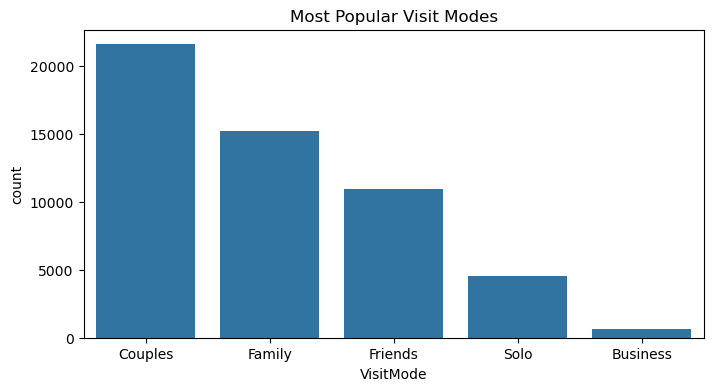

In [137]:
# 1 most popular Visit Modes 
plt.figure(figsize = (8,4))
sns.countplot(df,x= 'VisitMode' ,order  = df['VisitMode'].value_counts().index)
plt.title('Most Popular Visit Modes')
plt.show()

In [138]:
# most users are couples 

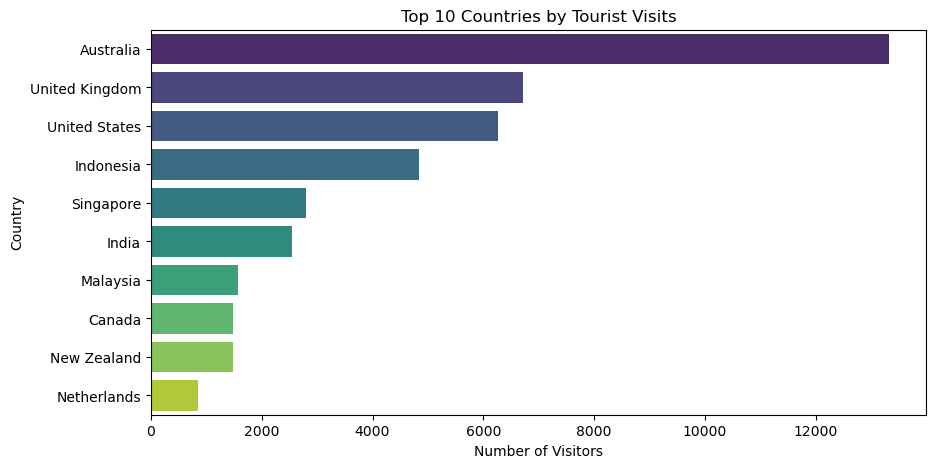

In [139]:
# Top countries by Number of Tourists 
plt.figure(figsize = (10,5))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x = top_countries.values, y = top_countries.index,palette = 'viridis')
plt.title("Top 10 Countries by Tourist Visits")
plt.xlabel("Number of Visitors")
plt.ylabel("Country")
plt.show()

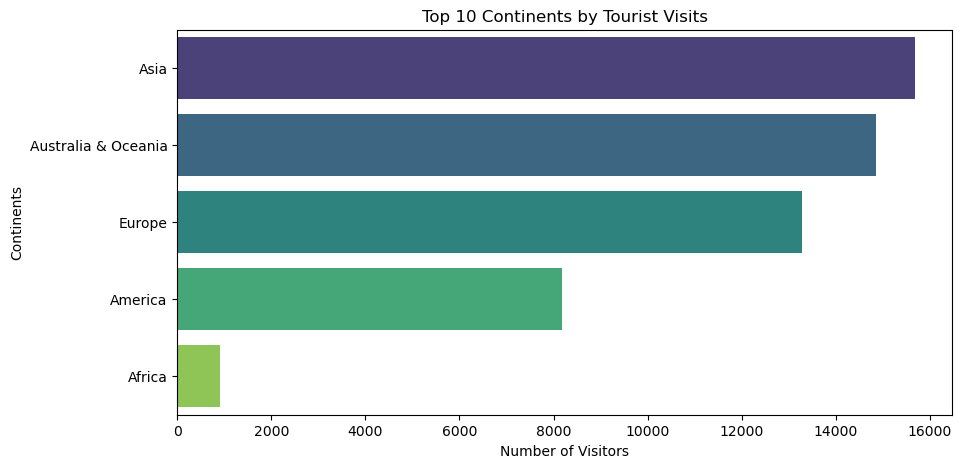

In [140]:
# Top continents  by Number of Tourists 
plt.figure(figsize = (10,5))
top_continents = df['Continent'].value_counts()
sns.barplot(x = top_continents.values, y = top_continents.index,palette = 'viridis')
plt.title("Top 10 Continents by Tourist Visits")
plt.xlabel("Number of Visitors")
plt.ylabel("Continents")
plt.show()

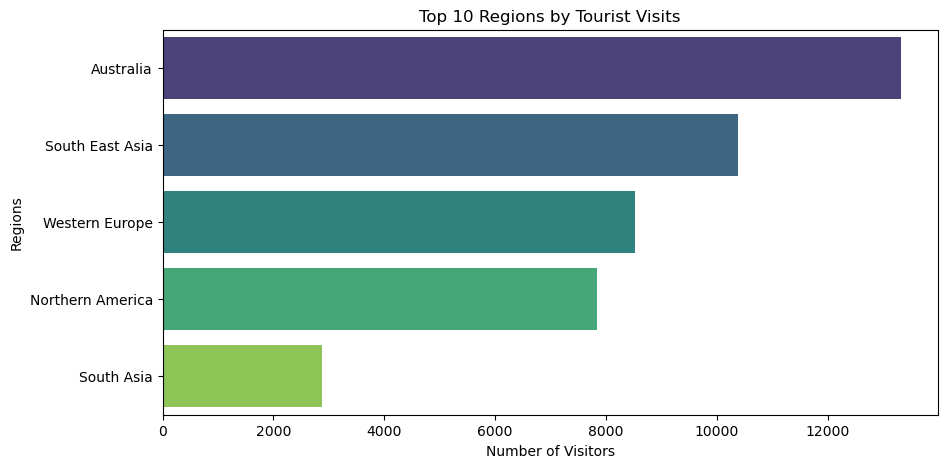

In [141]:
# Top Regions by Number of Tourists 
plt.figure(figsize = (10,5))
top_regions = df['Region'].value_counts().head()
sns.barplot(x = top_regions.values, y = top_regions.index,palette = 'viridis')
plt.title("Top 10 Regions by Tourist Visits")
plt.xlabel("Number of Visitors")
plt.ylabel("Regions")
plt.show()

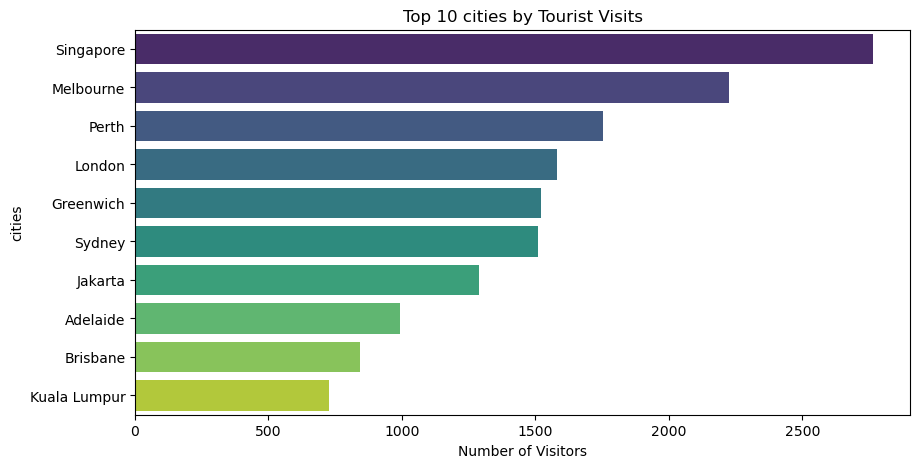

In [142]:
# Top cities by Number of Tourists 
plt.figure(figsize = (10,5))
top_cities = df['CityName'].value_counts().head(10)
sns.barplot(x = top_cities.values, y = top_cities.index,palette = 'viridis')
plt.title("Top 10 cities by Tourist Visits")
plt.xlabel("Number of Visitors")
plt.ylabel("cities")
plt.show()

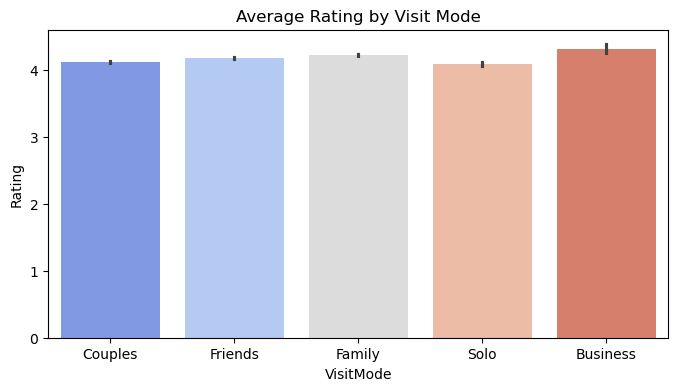

In [143]:
# 3. Average Rating by Visit Mode
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='VisitMode', y='Rating', estimator='mean', palette='coolwarm')
plt.title("Average Rating by Visit Mode")
plt.show()

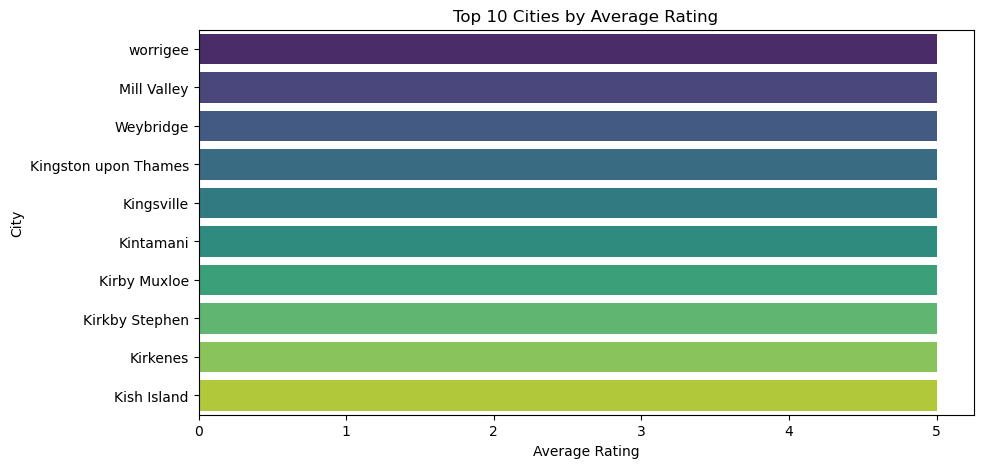

In [144]:
# 5. Average City Ratings (Top 10 Cities)
top_cities = df.groupby('CityName')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()

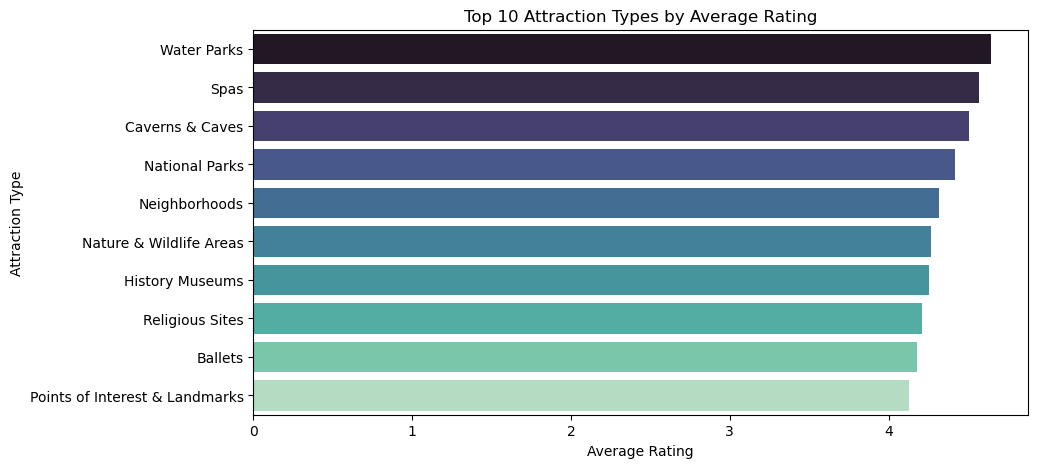

In [145]:
# Top 10 Attraction Types by Average Rating
top_attractions = df.groupby('AttractionType')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_attractions.values, y=top_attractions.index, palette='mako')
plt.title("Top 10 Attraction Types by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Attraction Type")
plt.show()




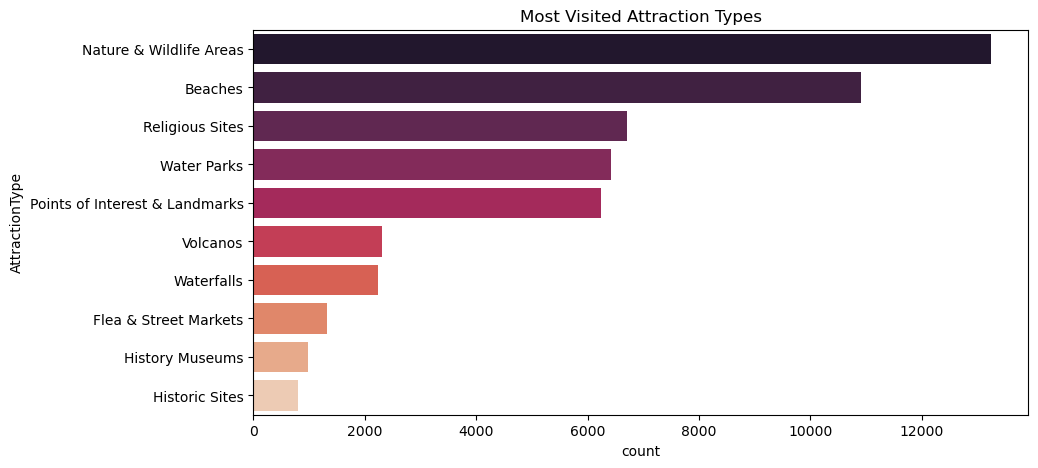

In [146]:
# Visit Count per Attraction Type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='AttractionType', order=df['AttractionType'].value_counts().index[:10], palette='rocket')
plt.title("Most Visited Attraction Types")
plt.show()

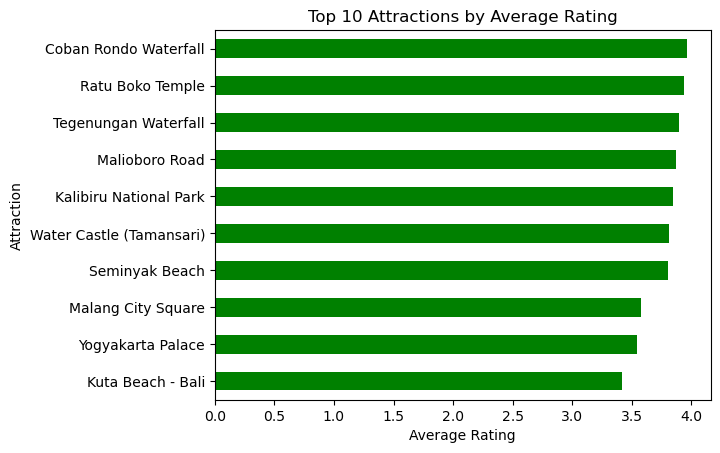

In [147]:

# Top 10 highest-rated attractions
top_attractions = df.groupby('Attraction')['Rating'].mean().sort_values().head(10)
top_attractions.plot(kind='barh', color='green')
plt.title("Top 10 Attractions by Average Rating")
plt.xlabel("Average Rating")
plt.show()

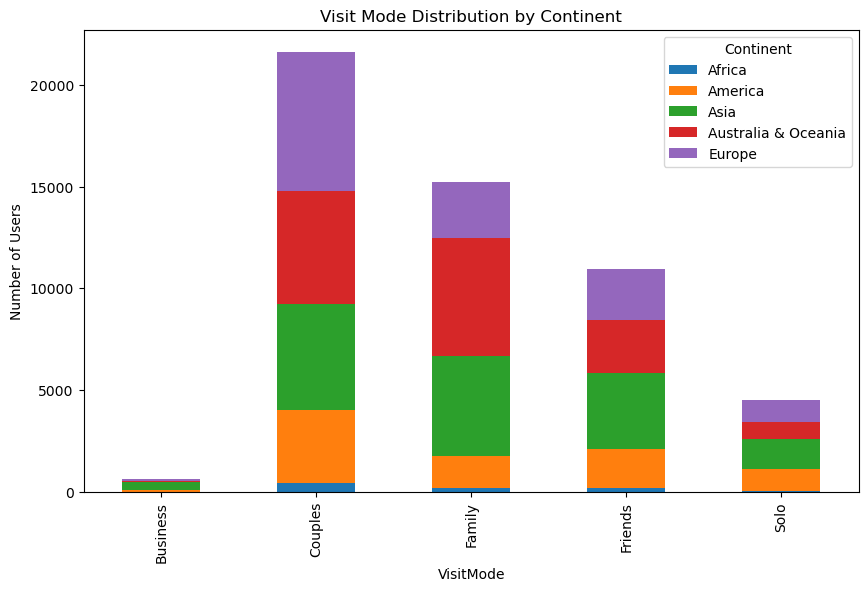

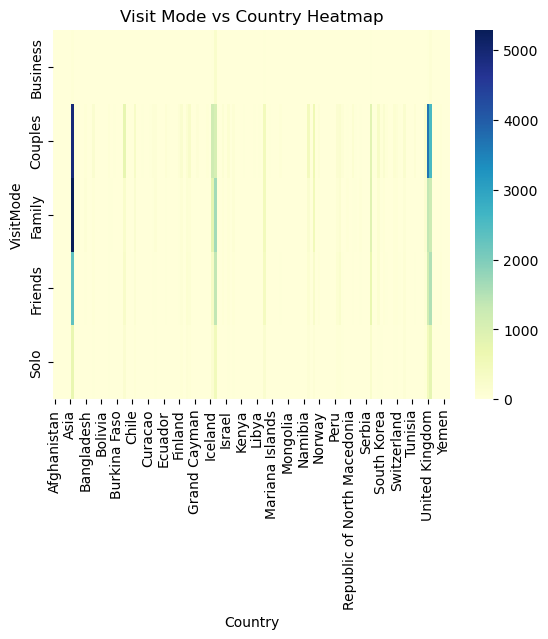

In [148]:
# Cross tabulation
mode_vs_continent = pd.crosstab(df['VisitMode'], df['Continent'])
mode_vs_continent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Visit Mode Distribution by Continent")
plt.ylabel("Number of Users")
plt.show()

# Heatmap for correlation
sns.heatmap(pd.crosstab(df['VisitMode'], df['Country']), cmap="YlGnBu")
plt.title("Visit Mode vs Country Heatmap")
plt.show()


In [149]:
df_work = df.copy()

In [155]:
# Cyclical encoding of month 
df_work["Month_sin"] = np.sin(2 * np.pi *df_work['VisitMonth'] / 12 )
df_work["Month_cos"] = np.cos(2 * np.pi * df_work["VisitMonth"] / 12)

season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
}
df_work["Season"] = df_work["VisitMonth"].map(season_map)

In [151]:
#================================
#  USER BEHAVIOR FEATURES
# ================================
user_stats = df_work.groupby("UserId").agg(
    user_total_visits=("TransactionId", "count"),
    user_avg_rating=("Rating", "mean"),
    user_unique_cities=("CityId", "nunique"),
    user_unique_attraction_types=("AttractionTypeId", "nunique")
).reset_index()

df_work = df_work.merge(user_stats, on="UserId", how="left")

# ================================
# ATTRACTION POPULARITY FEATURES
# ================================
attraction_stats = df_work.groupby("AttractionId").agg(
    attraction_total_visits=("TransactionId", "count"),
    attraction_avg_rating=("Rating", "mean")
).reset_index()

df_work = df_work.merge(attraction_stats, on="AttractionId", how="left")

# ================================
#  GEOGRAPHICAL POPULARITY FEATURES
# ================================
city_stats = df_work.groupby("CityId").agg(
    city_total_visits=("TransactionId", "count")
).reset_index()

df_work = df_work.merge(city_stats, on="CityId", how="left")

# ================================
# ENCODING CATEGORICAL VARIABLES
# ================================
df_work = pd.get_dummies(
    df_work, 
    columns=["VisitMode", "Continent", "AttractionType", "Season"],  # Season added
    drop_first=True
)

In [152]:

df.columns 

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitModeId',
       'AttractionId', 'Rating', 'VisitMode', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'AttractionType',
       'ContinentId', 'RegionId', 'CountryId', 'CityId', 'CityName',
       'Continent', 'Country', 'Region', 'visit_day_of_year',
       'VisitModeAvgRating', 'Month_sin', 'Month_cos'],
      dtype='object')

In [153]:
df_work.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitModeId',
       'AttractionId', 'Rating', 'AttractionCityId', 'AttractionTypeId',
       'Attraction', 'AttractionAddress', 'ContinentId', 'RegionId',
       'CountryId', 'CityId', 'CityName', 'Country', 'Region',
       'visit_day_of_year', 'VisitModeAvgRating', 'user_total_visits',
       'user_avg_rating', 'user_unique_cities', 'user_unique_attraction_types',
       'attraction_total_visits', 'attraction_avg_rating', 'city_total_visits',
       'VisitMode_Couples', 'VisitMode_Family', 'VisitMode_Friends',
       'VisitMode_Solo', 'Continent_America', 'Continent_Asia',
       'Continent_Australia & Oceania', 'Continent_Europe',
       'AttractionType_Ballets', 'AttractionType_Beaches',
       'AttractionType_Caverns & Caves',
       'AttractionType_Flea & Street Markets', 'AttractionType_Historic Sites',
       'AttractionType_History Museums', 'AttractionType_National Parks',
       'AttractionType_Nature & Wildlife 

In [156]:
# List all selected features for regression
feature_cols = [
     'Month_sin', 'Month_cos', 'user_total_visits', 
     'user_unique_cities', 'user_unique_attraction_types',
    'attraction_total_visits',  'city_total_visits',
    'visit_day_of_year',
    'VisitMode_Couples', 'VisitMode_Family', 'VisitMode_Friends', 'VisitMode_Solo',
    'Continent_America', 'Continent_Asia', 'Continent_Australia & Oceania', 'Continent_Europe',
    'AttractionType_Ballets', 'AttractionType_Beaches', 'AttractionType_Caverns & Caves',
    'AttractionType_Flea & Street Markets', 'AttractionType_Historic Sites',
    'AttractionType_History Museums', 'AttractionType_National Parks',
    'AttractionType_Nature & Wildlife Areas', 'AttractionType_Neighborhoods',
    'AttractionType_Points of Interest & Landmarks', 'AttractionType_Religious Sites',
    'AttractionType_Spas', 'AttractionType_Speciality Museums', 'AttractionType_Volcanos',
    'AttractionType_Water Parks', 'AttractionType_Waterfalls',
    'Season_Spring', 'Season_Summer', 'Season_Winter'
]

X = df_work[feature_cols]
y = df_work['Rating']


In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
#  Random Forest Regression
# ---------------------------
rf_model = RandomForestRegressor(
    n_estimators=100, max_depth=10, random_state=42, n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_valid)

# Evaluation
rf_rmse = mean_squared_error(y_valid, rf_preds, squared=False)
rf_r2 = r2_score(y_valid, rf_preds)
print(f"Random Forest RMSE: {rf_rmse:.4f}, R2: {rf_r2:.4f}")

# ---------------------------
#  XGBoost Regression
# ---------------------------
xgb_model = XGBRegressor(
    n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=-1
)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_valid)

# Evaluation
xgb_rmse = mean_squared_error(y_valid, xgb_preds, squared=False)
xgb_r2 = r2_score(y_valid, xgb_preds)
print(f"XGBoost RMSE: {xgb_rmse:.4f}, R2: {xgb_r2:.4f}")


Random Forest RMSE: 0.9129, R2: 0.1229
XGBoost RMSE: 0.9134, R2: 0.1219


In [158]:
df.columns 

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitModeId',
       'AttractionId', 'Rating', 'VisitMode', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'AttractionType',
       'ContinentId', 'RegionId', 'CountryId', 'CityId', 'CityName',
       'Continent', 'Country', 'Region', 'visit_day_of_year',
       'VisitModeAvgRating', 'Month_sin', 'Month_cos'],
      dtype='object')

In [159]:
selected_features = [
    # Time features
    'VisitYear', 'VisitMonth', 'visit_day_of_year', 'Month_sin', 'Month_cos',
    'Season_Spring', 'Season_Summer', 'Season_Winter',
    
    # User profile aggregates
    'user_total_visits', 'user_avg_rating',
    'user_unique_cities', 'user_unique_attraction_types',
    
    # Attraction-level features
    'attraction_total_visits', 'attraction_avg_rating',
    
    # City-level features
    'city_total_visits',
    
    # Encoded location features
    'ContinentId', 'RegionId', 'CountryId', 'CityId',
    'Continent_America', 'Continent_Asia',
    'Continent_Australia & Oceania', 'Continent_Europe',
    
    # Encoded attraction types
    'AttractionTypeId',
    'AttractionType_Ballets', 'AttractionType_Beaches',
    'AttractionType_Caverns & Caves', 'AttractionType_Flea & Street Markets',
    'AttractionType_Historic Sites', 'AttractionType_History Museums',
    'AttractionType_National Parks', 'AttractionType_Nature & Wildlife Areas',
    'AttractionType_Neighborhoods', 'AttractionType_Points of Interest & Landmarks',
    'AttractionType_Religious Sites', 'AttractionType_Spas',
    'AttractionType_Speciality Museums', 'AttractionType_Volcanos',
    'AttractionType_Water Parks', 'AttractionType_Waterfalls'
]
X= df_work[selected_features]
y = df['VisitMode']

In [160]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report



X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_valid)
print("Random Forest Accuracy:", accuracy_score(y_valid, rf_preds))
print(classification_report(y_valid, rf_preds))



Random Forest Accuracy: 0.49437883797827115
              precision    recall  f1-score   support

    Business       0.00      0.00      0.00       135
     Couples       0.48      0.86      0.62      4337
      Family       0.56      0.38      0.45      2995
     Friends       0.44      0.14      0.22      2190
        Solo       0.97      0.03      0.06       928

    accuracy                           0.49     10585
   macro avg       0.49      0.28      0.27     10585
weighted avg       0.53      0.49      0.43     10585



In [161]:
'''This is a common machine learning confusion:

RandomForestClassifier can accept string class labels (like "Business", "Couples", etc.).

XGBClassifier (from the classic xgboost package), by default, requires integer-encoded labels (0, 1, 2, 3, ...) for multiclass classification'''

'This is a common machine learning confusion:\n\nRandomForestClassifier can accept string class labels (like "Business", "Couples", etc.).\n\nXGBClassifier (from the classic xgboost package), by default, requires integer-encoded labels (0, 1, 2, 3, ...) for multiclass classification'

In [162]:
from sklearn.preprocessing import LabelEncoder

# Fit encoder on all data, so mapping is consistent
le = LabelEncoder()
le.fit(y)   # y is your original Series
y_train_enc = le.transform(y_train)
y_valid_enc = le.transform(y_valid)

# Train XGB with encoded targets
xgb_clf.fit(X_train, y_train_enc)
xgb_preds = xgb_clf.predict(X_valid)
# To revert predictions to original names:
xgb_preds_labels = le.inverse_transform(xgb_preds)

print("XGBoost Accuracy:", accuracy_score(y_valid, xgb_preds_labels))
print(classification_report(y_valid, xgb_preds_labels))


XGBoost Accuracy: 0.504959848842702
              precision    recall  f1-score   support

    Business       1.00      0.07      0.12       135
     Couples       0.49      0.83      0.62      4337
      Family       0.55      0.44      0.49      2995
     Friends       0.44      0.16      0.24      2190
        Solo       0.77      0.06      0.11       928

    accuracy                           0.50     10585
   macro avg       0.65      0.31      0.32     10585
weighted avg       0.53      0.50      0.45     10585



# RECOMMENDATION SYSTEMS 

In [163]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [164]:

#1. Collaborative Filtering

# Create user-item rating matrix
user_item_matrix = df.pivot_table(index='UserId', columns='AttractionId', values='Rating').fillna(0)

# Compute similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

def recommend_collaborative(user_id, top_n=5):
    # Get similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]  # skip self
    # Aggregate their ratings
    similar_users_ratings = user_item_matrix.loc[similar_users].mean(axis=0)
    # Remove attractions already visited
    visited = user_item_matrix.loc[user_id]
    similar_users_ratings = similar_users_ratings[visited == 0]
    return similar_users_ratings.sort_values(ascending=False).head(top_n).index.tolist()

In [165]:
sample_user = df['UserId'].iloc[0]

print("Collaborative Recommendations:", recommend_collaborative(sample_user))

Collaborative Recommendations: [841, 748, 824, 737, 650]


In [167]:

# Content-Based Filtering

# Create a combined features column
df['combined_features'] = df['AttractionTypeId'].astype(str) + " " + df['AttractionCityId'].astype(str)

# Remove duplicates per attraction
attraction_features = df[['AttractionId', 'combined_features']].drop_duplicates().set_index('AttractionId')

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(attraction_features['combined_features'])

# Cosine similarity between attractions
attraction_similarity = cosine_similarity(tfidf_matrix)

attraction_similarity_df = pd.DataFrame(attraction_similarity,
                                        index=attraction_features.index,
                                        columns=attraction_features.index)

def recommend_content(user_id, top_n=5):
    visited_attractions = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index.tolist()
    scores = pd.Series(dtype=float)
    for attraction in visited_attractions:
        scores = scores.add(pd.Series(attraction_similarity_df[attraction]), fill_value=0)
    scores = scores.drop(visited_attractions, errors='ignore')
    return scores.sort_values(ascending=False).head(top_n).index.tolist()


In [166]:

# Hybrid Recommendation

def recommend_hybrid(user_id, top_n=5):
    collab_recs = recommend_collaborative(user_id, top_n*2)
    content_recs = recommend_content(user_id, top_n*2)
    combined = list(dict.fromkeys(collab_recs + content_recs))  # keep order, remove duplicates
    return combined[:top_n]

In [169]:
sample_user = df['UserId'].iloc[15246]

print("Collaborative Recommendations:", recommend_collaborative(sample_user))
print("Content-Based Recommendations:", recommend_content(sample_user))
print("Hybrid Recommendations:", recommend_hybrid(sample_user))

Collaborative Recommendations: [640, 748, 824, 737, 650]
Content-Based Recommendations: [369, 937, 1280, 1278, 1238]
Hybrid Recommendations: [640, 748, 824, 737, 650]
